In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

## Data Dictionary

1. *Student Id* : A unique identifier for each student (e.g., S00001)
2. *Study Hours per Week* : The average number of hours a student studies per week. Note: This column contains some incorrect values (e.g., negative hours)
3. *Attendance Rate* :
The percentage of classes a student attended. Note: This column contains some values exceeding 100% (e.g., 150%)
4. *Previous Grades* : 
The average grade the student received in previous courses (scale of 0 to 100). Note: This column contains some incorrect values (e.g., grades over 100)
5. *Participation in Extracurricular Activities* : Indicates whether the student participates in extracurricular activities (Yes/No)
6. *Parent Education Level* : The highest level of education attained by the student's parents (e.g., High School, Associate, Bachelor, Master, Doctorate)
7. *Passed* : The target variable, indicating whether the student passed the course (Yes/No)

In [10]:
#!kaggle datasets download -d haseebindata/student-performance-predictions

Dataset URL: https://www.kaggle.com/datasets/haseebindata/student-performance-predictions
License(s): apache-2.0
  0%|                                               | 0.00/9.46k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 9.46k/9.46k [00:00<00:00, 7.27MB/s]


In [12]:
#!unzip student-performance-predictions.zip 

Archive:  student-performance-predictions.zip
  inflating: best_student_performance_model.pkl  
  inflating: st.ipynb                
  inflating: student_performance.csv  


In [37]:
df = pd.read_csv('student_performance_prediction.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [18]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [19]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [25]:
# Check and handle null values if there is any

missing_values = df.isna().sum().sort_values(ascending = False)

In [26]:
missing_percentages = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages


Participation in Extracurricular Activities    0.050000
Parent Education Level                         0.050000
Passed                                         0.050000
Study Hours per Week                           0.049875
Previous Grades                                0.049850
Attendance Rate                                0.049800
Student ID                                     0.000000
dtype: float64

<Axes: >

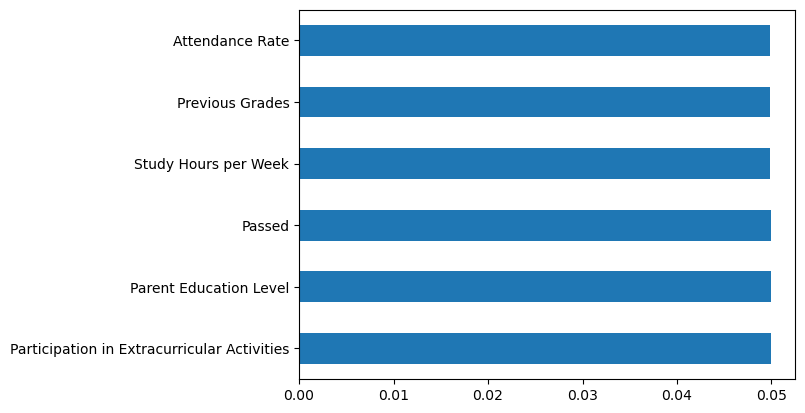

In [28]:
# Visualize
missing_percentages[missing_percentages != 0].plot(kind='barh')

### Almost 5 % data is missing

Now in the target field there is some null values present , so let's drop those and check again the count of null values.

In [40]:
# Drop NaN values from target column
df.dropna(subset=['Passed'],inplace=True)

In [42]:
df.isna().sum()

Student ID                                        0
Study Hours per Week                           1905
Attendance Rate                                1888
Previous Grades                                1877
Participation in Extracurricular Activities    1902
Parent Education Level                         1898
Passed                                            0
dtype: int64

In [43]:
# Let's fill na values with average for Study Hours per Week,Previous Grades and Attendance Rate column
df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(),inplace=True)
df['Attendance Rate'].fillna(df['Attendance Rate'].mean(),inplace=True)

In [48]:
df.isna().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities    1902
Parent Education Level                         1898
Passed                                            0
dtype: int64

In [46]:
# Check the Previous grade column
df['Previous Grades'].unique()

array([ 75. ,  60.6,  64. ,  62.4,  72.7,  69.3,  93.6,  59.2,  91.9,
        72.3,  41.2,  50.4,  49.2,  55.9,  98. ,  51.8,  40.8,  72.4,
        68.6,  98.2,  64.4,  30.7,  58.6,  58.3,  46.5,  56.6,  62.8,
        64.1,  44.3,  74.1,  89.5,  69.2,  81.6,  67.7,  49.3,  69.1,
        57.5,  48.4,  63.8,  77.3,  59.9,  94.1,  79.3,  56.8,  56.3,
        97.2,  60. ,  70.5,  71.3,  39.1,  39.3,   nan,  65.2,  42.3,
        60.1,  68.2,  34.1,  65.8,  66.6,  58. ,  48.5,  59.4,  93.9,
        63.2,  71.4,  70.8,  71.7,  74. ,  43.1,  67.8,  55.7,  63.4,
        64.7,  67.6,  39.8,  74.8,  68.7,  54.1,  52.1,  77. ,  84.6,
        76.5,  26.9,  54.8, 200. ,  49.1,  91.5,  61.8,  52. ,  71.2,
        47.3,  63.3,  58.2,  51. ,  49.5,  45.5,  81.5,  68. ,  55.6,
        87.3,  61.4,  73. ,  86.6,  68.1,  82.4,  73.1,  56.7,  65. ,
        56.4,  48.8,  85.4,  85. ,  44.9,  56.2,  40. ,  82.2,  29. ,
        76.9,  66.9,  80.8,  74.4,  74.2,  78.5,  61.6,  97.8,  63.7,
        47.8,  52.4,

In [47]:
# fill na values with average for Previous Grades column as well
df['Previous Grades'].fillna(df['Previous Grades'].mean(),inplace=True)

In [50]:
# Check the Participation in Extracurricular Activities  column now
df['Participation in Extracurricular Activities'].value_counts()

Participation in Extracurricular Activities
No     18066
Yes    18032
Name: count, dtype: int64

In [51]:
# Parent Education 
df['Parent Education Level'].value_counts()

Parent Education Level
Bachelor       7290
High School    7264
Doctorate      7250
Associate      7241
Master         7057
Name: count, dtype: int64

### As per data value counts is almost equally distributed Parent Education Level and Participation in Extracurricular Activities, so we can fill any values , it might effect the model performance. Lets drop those NaN


In [53]:
# Drop NaN for Parent Education Level and Participation in Extracurricular Activities column

df.dropna(subset=["Parent Education Level", "Participation in Extracurricular Activities"],inplace=True)

In [54]:
df.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34306 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   34306 non-null  object 
 1   Study Hours per Week                         34306 non-null  float64
 2   Attendance Rate                              34306 non-null  float64
 3   Previous Grades                              34306 non-null  float64
 4   Participation in Extracurricular Activities  34306 non-null  object 
 5   Parent Education Level                       34306 non-null  object 
 6   Passed                                       34306 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


<Axes: ylabel='Frequency'>

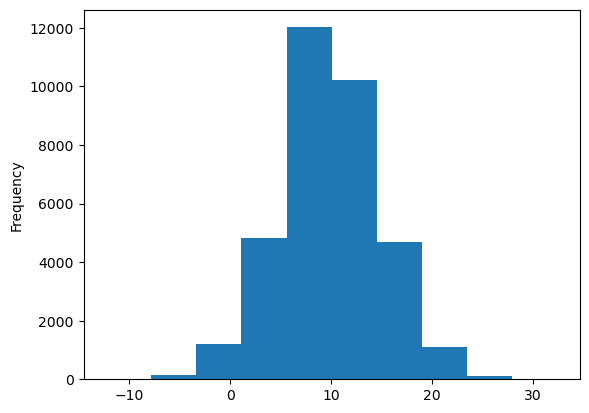

In [56]:
# Lets check the distribution of data

df['Study Hours per Week'].plot(kind='hist')

<Axes: ylabel='Frequency'>

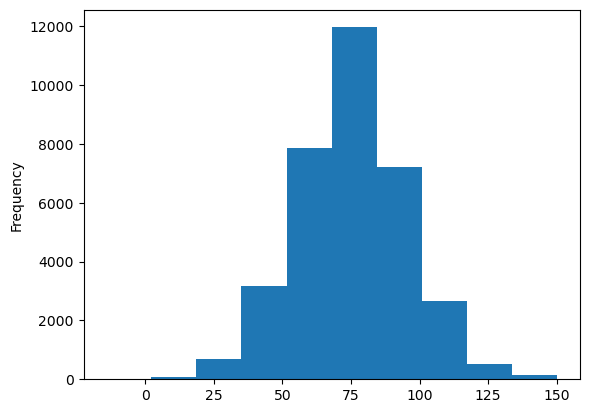

In [57]:
df['Attendance Rate'].plot(kind='hist')

<Axes: ylabel='Frequency'>

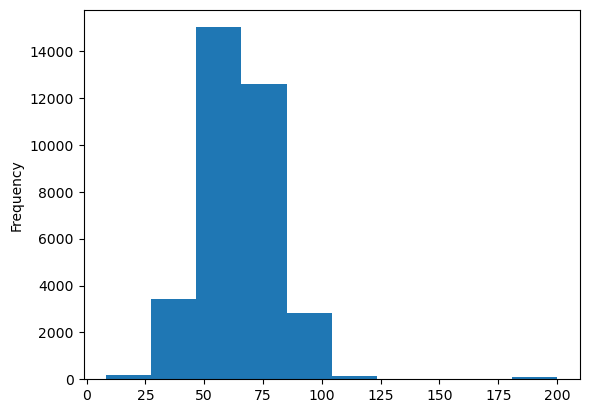

In [58]:
df['Previous Grades'].plot(kind='hist')

### From above diagrams it's clear that there is some outlier present in datasets, that we need to handle properly otherwise model might get confused.

In [79]:
# Lets handle the outlier for Study hours per week
Avg_pos_stud = df['Study Hours per Week'][df['Study Hours per Week'] > 0].mean()
Avg_pos_stud



10.256618474436838

In [74]:
df['Study Hours per Week'][df['Study Hours per Week'] < 0] = df['Study Hours per Week'][df['Study Hours per Week'] > 0].mean()

/var/folders/1q/97slxf2n6bv2jwc9z0pm2jch0000gn/T/ipykernel_1618/3974794994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Study Hours per Week'][df['Study Hours per Week'] < 0] = df['Study Hours per Week'][df['Study Hours per Week'] > 0].mean()


<Axes: ylabel='Frequency'>

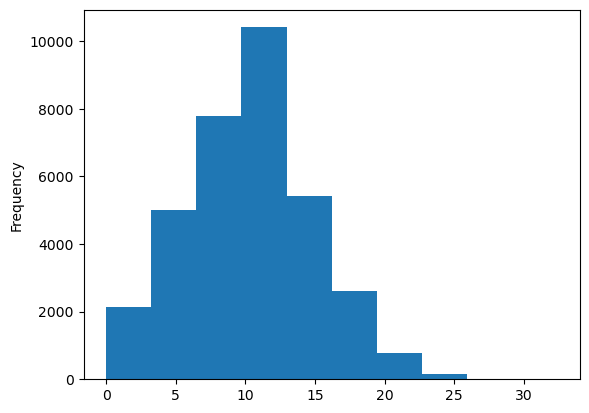

In [82]:
# Now check the histogram plot again
df['Study Hours per Week'].plot(kind='hist')

In [87]:
# Now for Attendance Rate it isn't normal to have 150% attendance, it should be 0-100
# So lets chyange 100+ attendance rate to 100.

df['Attendance Rate'][df['Attendance Rate'] > 100] = 100

/var/folders/1q/97slxf2n6bv2jwc9z0pm2jch0000gn/T/ipykernel_1618/47636844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attendance Rate'][df['Attendance Rate'] > 100] = 100


<Axes: ylabel='Frequency'>

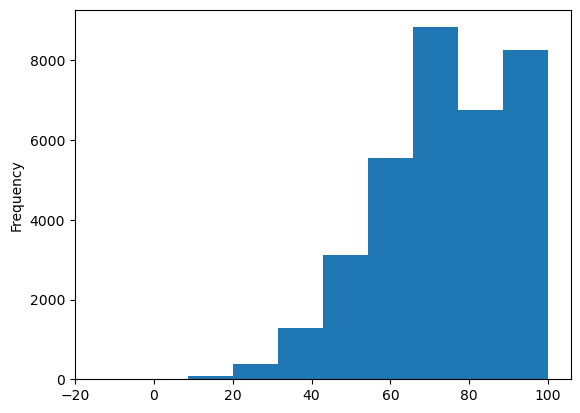

In [88]:
df['Attendance Rate'].plot(kind='hist')

In [90]:
# Lets do the same for Previous Grades
df['Previous Grades'][df['Previous Grades'] > 100] = 100

/var/folders/1q/97slxf2n6bv2jwc9z0pm2jch0000gn/T/ipykernel_1618/1708783317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous Grades'][df['Previous Grades'] > 100] = 100


<Axes: >

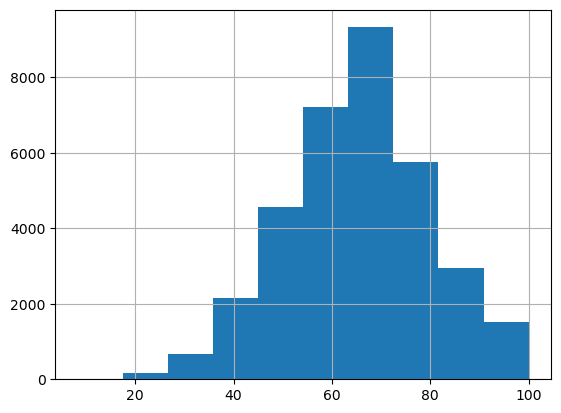

In [91]:
df['Previous Grades'].hist()

In [92]:
### Lets check the Corelation of columns with target column
# first convert target column into 0(Failed) and 1(Passed)
df['Passed'] = df.Passed.map({"Yes": 1, "No": 0})
df.Passed


0        1
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    0
39998    0
39999    1
Name: Passed, Length: 34306, dtype: int64

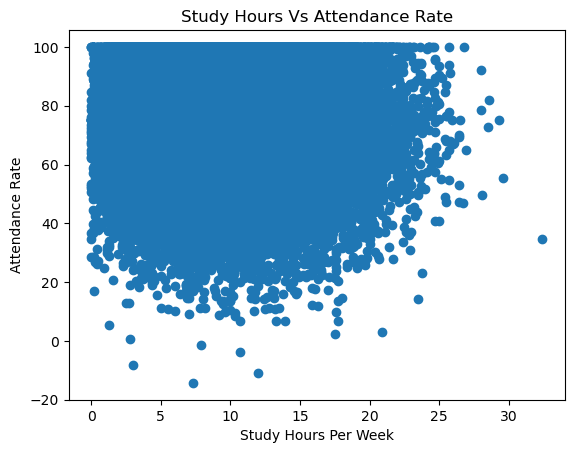

In [101]:
# scatter plot of Study vs target
plt.scatter(df['Study Hours per Week'],df['Attendance Rate'])
plt.title("Study Hours Vs Attendance Rate")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Attendance Rate")
plt.show()

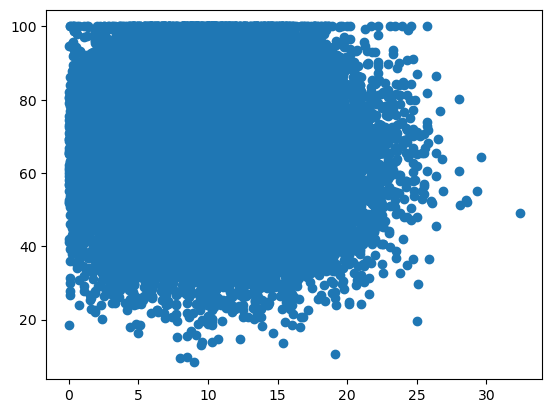

In [102]:
plt.scatter(df['Study Hours per Week'],df['Previous Grades'])

In [103]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,75.269913,75.0,Yes,Master,1
1,S00002,9.3,95.300000,60.6,No,High School,0
2,S00003,13.2,75.269913,64.0,No,Associate,0
3,S00004,17.6,76.800000,62.4,Yes,Bachelor,0
4,S00005,8.8,89.300000,72.7,No,Master,0


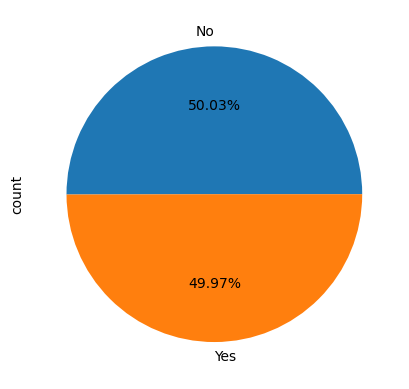

In [106]:
# check Participation in Extracurricular Activities	column
df['Participation in Extracurricular Activities'].value_counts().plot(kind='pie',autopct ="%.2f%%")
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'High School'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Doctorate'),
  Text(4, 0, 'Master')])

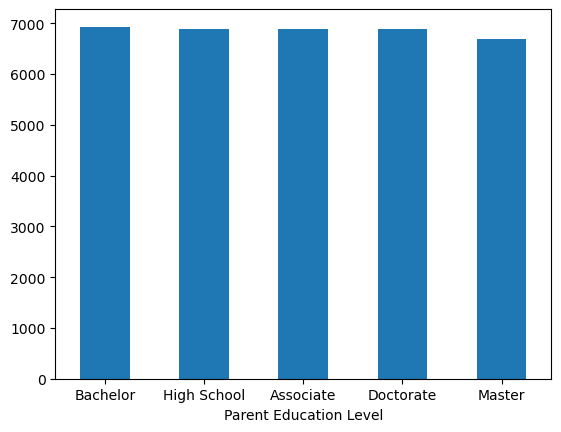

In [109]:
# Check Parent Education column
df['Parent Education Level'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)

In [110]:
df.groupby('Parent Education Level')['Study Hours per Week'].mean()

Parent Education Level
Associate      10.257500
Bachelor       10.289810
Doctorate      10.236348
High School    10.207505
Master         10.242233
Name: Study Hours per Week, dtype: float64

In [111]:
# check with target
df.groupby('Passed')['Study Hours per Week'].mean()

Passed
0    10.299051
1    10.194301
Name: Study Hours per Week, dtype: float64

In [132]:
# Passed vs Parent Education
passed_vs_education = df.groupby('Passed')['Parent Education Level'].value_counts()
passed_vs_education

Passed  Parent Education Level
0       Associate                 3502
        Bachelor                  3475
        High School               3453
        Doctorate                 3385
        Master                    3363
1       Doctorate                 3505
        Bachelor                  3457
        High School               3443
        Associate                 3393
        Master                    3330
Name: count, dtype: int64

<Axes: xlabel='Passed,Parent Education Level'>

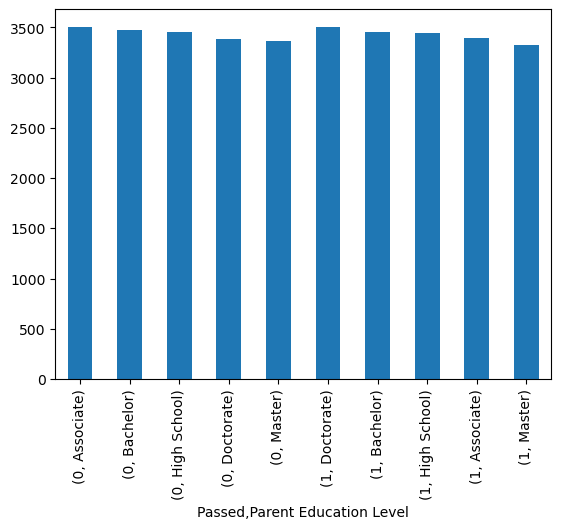

In [126]:
passed_vs_education.plot(kind='bar')

In [117]:
parent_education_df = passed_vs_education.reset_index()
parent_education_df

,Passed,Parent Education Level,count
0,0,Associate,3502
1,0,Bachelor,3475
2,0,High School,3453
3,0,Doctorate,3385
4,0,Master,3363
5,1,Doctorate,3505
6,1,Bachelor,3457
7,1,High School,3443
8,1,Associate,3393
9,1,Master,3330


<BarContainer object of 10 artists>

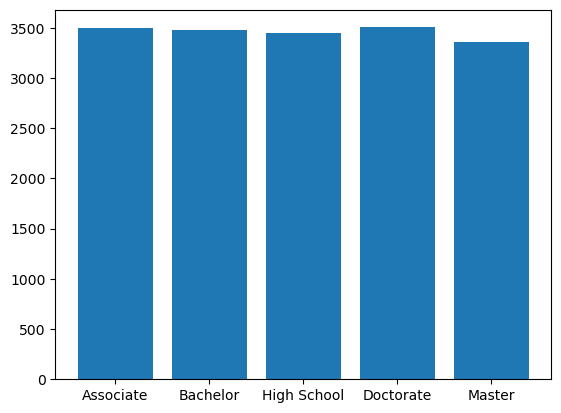

In [124]:
# Let's visualize 
# Plot bar graph
plt.bar(parent_education_df['Parent Education Level'],parent_education_df['count'])

In [127]:
pivot_df = parent_education_df.pivot(index='Parent Education Level', columns='Passed', values='count')
pivot_df

Passed,0,1
Parent Education Level,,
Associate,3502,3393
Bachelor,3475,3457
Doctorate,3385,3505
High School,3453,3443
Master,3363,3330


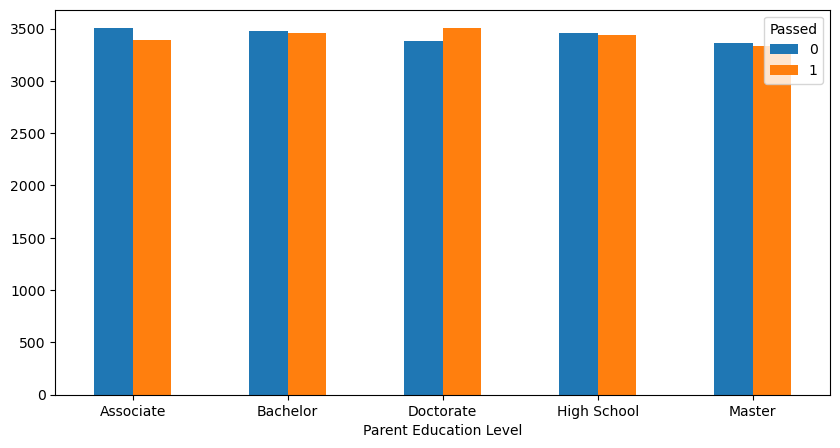

In [131]:
pivot_df.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=0);

In [133]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,75.269913,75.0,Yes,Master,1
1,S00002,9.3,95.300000,60.6,No,High School,0
2,S00003,13.2,75.269913,64.0,No,Associate,0
3,S00004,17.6,76.800000,62.4,Yes,Bachelor,0
4,S00005,8.8,89.300000,72.7,No,Master,0


In [135]:
# Lets check Participation in Extracurricular Activities vs target
groupb_participation = df.groupby("Passed")['Participation in Extracurricular Activities'].value_counts()
groupb_participation

Passed  Participation in Extracurricular Activities
0       No                                             8618
        Yes                                            8560
1       Yes                                            8581
        No                                             8547
Name: count, dtype: int64

In [137]:
participation_df = groupb_participation.reset_index()
participation_df

,Passed,Participation in Extracurricular Activities,count
0,0,No,8618
1,0,Yes,8560
2,1,Yes,8581
3,1,No,8547


In [138]:
participation_pivot = participation_df.pivot(index='Participation in Extracurricular Activities',columns='Passed',values='count')
participation_pivot

Passed,0,1
Participation in Extracurricular Activities,,
No,8618,8547
Yes,8560,8581


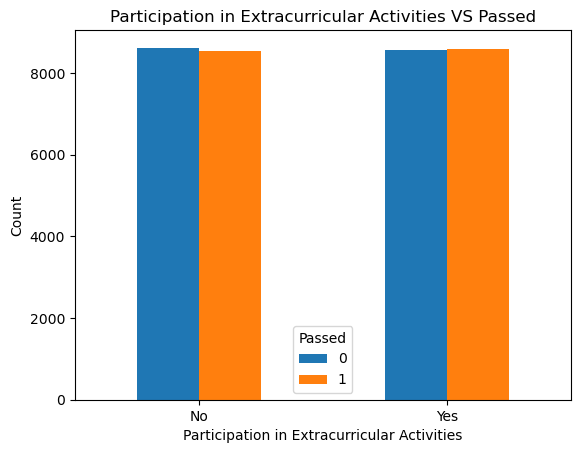

In [141]:
# plot a bar graph
participation_pivot.plot(kind='bar')
plt.title('Participation in Extracurricular Activities VS Passed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()